<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


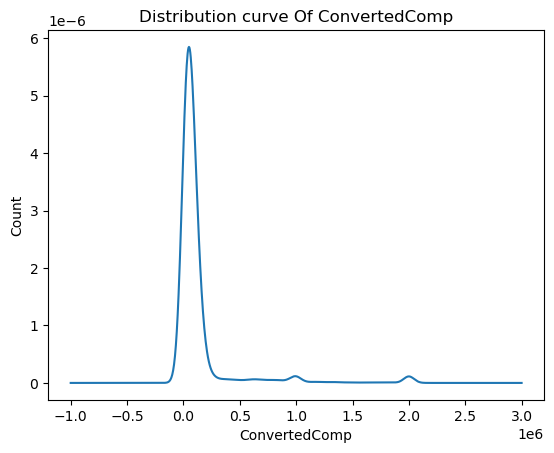

In [3]:
# your code goes here
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df['ConvertedComp'].plot(kind='kde')
plt.title('Distribution curve Of ConvertedComp')
plt.ylabel('Count')
plt.xlabel('ConvertedComp')
plt.show()

# seaborn histogram
#sns.distplot(df['ConvertedComp'], hist=True, kde=True, 
    #bins=int(180/5), color = 'blue',
    #hist_kws={'edgecolor':'black'})

Plot the histogram for the column `ConvertedComp`.


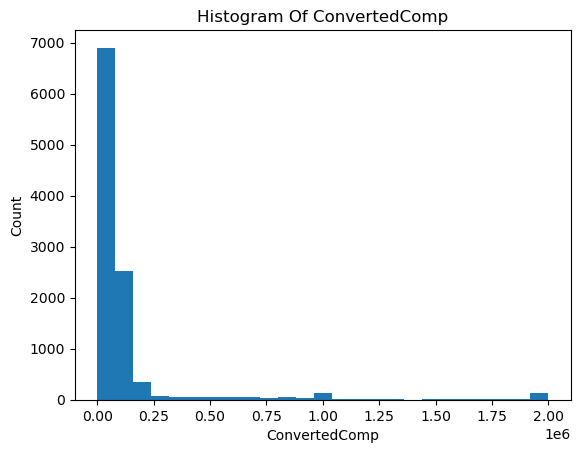

In [4]:
# your code goes here
df['ConvertedComp'].plot(kind='hist', bins=25)
plt.title('Histogram Of ConvertedComp')
plt.ylabel('Count')
plt.xlabel('ConvertedComp')
plt.show()

What is the median of the column `ConvertedComp`?


In [5]:
# your code goes here
median_converted_comp = df['ConvertedComp'].median(axis=0)
print('median of the column ConvertedComp', median_converted_comp)

median of the column ConvertedComp 57745.0


How many responders identified themselves only as a **Man**?


In [6]:
# your code goes here
count_man = df['Gender'].value_counts().to_frame()
count_man

,Gender
Man,10480
Woman,731
"Non-binary, genderqueer, or gender non-conforming",63
"Man;Non-binary, genderqueer, or gender non-conforming",26
"Woman;Non-binary, genderqueer, or gender non-conforming",14
Woman;Man,9
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",2


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [7]:
# your code goes here
df_woman = df.loc[df['Gender'] == 'Woman']
df_woman
median_converted_com_woman = df_woman['ConvertedComp'].median(axis=0)
print('median ConvertedComp of responders identified themselves only as a Woman', median_converted_com_woman)

median ConvertedComp of responders identified themselves only as a Woman 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [8]:
# your code goes here
#sns.boxplot(y='Age', data=df)
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


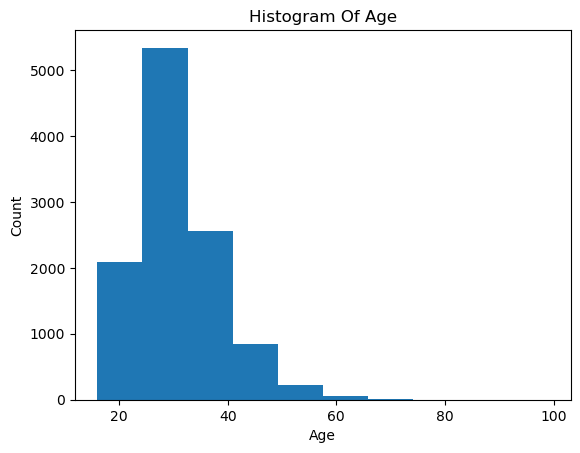

In [9]:
# your code goes here
df['Age'].plot(kind='hist')
plt.title('Histogram Of Age')
plt.ylabel('Count')
plt.xlabel('Age')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


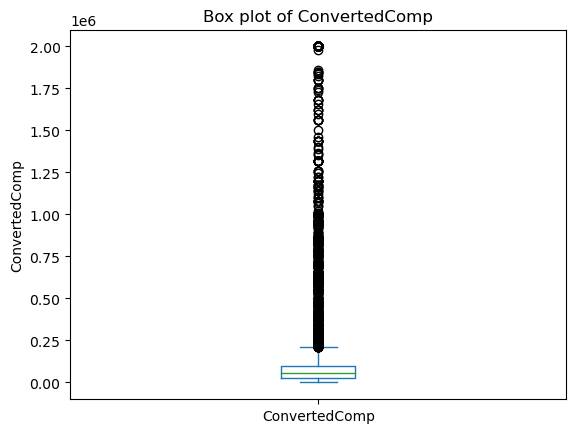

In [10]:
# your code goes here
df['ConvertedComp'].plot(kind='box')
plt.title('Box plot of ConvertedComp')
plt.ylabel('ConvertedComp')

plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [11]:
# your code goes here
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)
iqr = q3 - q1
print('iqr value is:', iqr)

iqr value is: 73132.0


Find out the upper and lower bounds.


In [12]:
# your code goes here
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print('upper bound is', upper)
print('lower bound is', lower)

upper bound is 209698.0
lower bound is -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [13]:
# your code goes here
print(((df['ConvertedComp'] < (q1 - 1.5 * iqr)) | (df['ConvertedComp'] > (q3 + 1.5 * iqr))).sum())

879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [14]:
# your code goes here
df_new = df[(df['ConvertedComp'] > (q1 - 1.5 * iqr)) & (df['ConvertedComp'] < (q3 + 1.5 * iqr))]
median_new = df_new['ConvertedComp'].median(axis=0)
mean_new = df_new['ConvertedComp'].mean(axis=0)
print('median of the column ConvertedComp', median_new)
print('mean of the column ConvertedComp', mean_new)

median of the column ConvertedComp 52704.0
mean of the column ConvertedComp 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [15]:
# your code goes here
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
